In [1]:
#config de lib y estilos de las graficas, y cargar el dataset
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

df = pd.read_csv("data.csv")

In [2]:
#imprime las primeras 5

print(df.head())

        Marca temporal 1.- ¿Cuál es su rango de edad?   \
0  20/09/2025 14:37:13                      18-25 años   
1  20/09/2025 15:29:37                      36-45 años   
2  22/09/2025 18:44:35                      18-25 años   
3  22/09/2025 18:53:38                      26-35 años   
4  22/09/2025 19:04:19                      26-35 años   

  2.- ¿Cuál es su perfil?            3.- ¿En qué ciudad/región reside?   \
0  Propietario de vehiculo  Ciudad mediana (100,000-500,000 habitantes)   
1  Propietario de vehiculo    Ciudad grande (más de 500,000 habitantes)   
2  Propietario de vehiculo  Ciudad mediana (100,000-500,000 habitantes)   
3  Propietario de vehiculo    Ciudad grande (más de 500,000 habitantes)   
4  Propietario de vehiculo  Ciudad mediana (100,000-500,000 habitantes)   

  4.- ¿Cuántos vehículos posee actualmente?  \
0                                1 vehículo   
1                               2 vehículos   
2                                1 vehículo   
3           

In [3]:
#muesra los ultimos 5

print(df.tail())

         Marca temporal 1.- ¿Cuál es su rango de edad?   \
36  29/09/2025 15:20:08                      18-25 años   
37  29/09/2025 18:12:50                      26-35 años   
38  29/09/2025 18:13:59                      18-25 años   
39  29/09/2025 18:15:36                      18-25 años   
40  29/09/2025 19:39:13                      18-25 años   

   2.- ¿Cuál es su perfil?             3.- ¿En qué ciudad/región reside?   \
36  Propietario de vehiculo  Ciudad pequeña (menos de 100,000 habitantes)   
37  Propietario de vehiculo     Ciudad grande (más de 500,000 habitantes)   
38  Propietario de vehiculo     Ciudad grande (más de 500,000 habitantes)   
39  Propietario de vehiculo     Ciudad grande (más de 500,000 habitantes)   
40  Propietario de vehiculo     Ciudad grande (más de 500,000 habitantes)   

   4.- ¿Cuántos vehículos posee actualmente?  \
36                                1 vehículo   
37                                1 vehículo   
38                                1 ve

In [4]:
#informacion general para entender el dataset

print(f"Numero de filas {df.shape[0]}" ) 
print(f"Numero de columnas {df.shape[1]}" )
print(f"Columnas: {df.columns.tolist()}" )

Numero de filas 41
Numero de columnas 22
Columnas: ['Marca temporal', '1.- ¿Cuál es su rango de edad? ', '2.- ¿Cuál es su perfil? ', '3.- ¿En qué ciudad/región reside? ', '4.- ¿Cuántos vehículos posee actualmente?', '5.- ¿Con qué frecuencia lleva su vehículo al taller mecánico?', '6.- En promedio, ¿Cuánto gasta mensualmente en mantenimiento y reparaciones de su vehículo?', '7.- ¿Qué tan satisfecho está con los servicios de diagnóstico que recibe en talleres mecánicos?', '8.- ¿Ha tenido experiencias donde sintió que le cobraron por servicios innecesarios?', '9.- ¿Qué tan difícil es para usted encontrar talleres mecánicos confiables?', '10.- ¿Lleva un registro organizado del historial de mantenimiento de su vehículo?', '11.- ¿Con que frecuencia olvida realizar el mantenimiento preventivo recomendado de su vehículo?', '12.- Cuando su vehículo presenta una falla, ¿qué hace primero?', '13.- ¿Qué tan útil consideraría una aplicación móvil que le proporcione diagnósticos preliminares de probl

In [5]:
#config los nombres de las columnas (para manejarlas mas facil)

df.columns = [
    "mt",
    "edad",
    "perfil",
    "ciudad",
    "cant_vehiculos",
    "freq_taller",
    "gasto_mensual",
    "sat_diagnostico",
    "cobros_innecesarios",
    "dfc_taller",
    "registro",
    "olv_mantenimiento",
    "accion_falla",
    "util_app",
    "dispuesto_chat",
    "confianza_ia",
    "caracteristicas_valoradas",
    "pref_citas",
    "pago_dispuesto",
    "probabilidad_uso",
    "otras_funcionalidades",
    "email",
]

df.columns

Index(['mt', 'edad', 'perfil', 'ciudad', 'cant_vehiculos', 'freq_taller',
       'gasto_mensual', 'sat_diagnostico', 'cobros_innecesarios', 'dfc_taller',
       'registro', 'olv_mantenimiento', 'accion_falla', 'util_app',
       'dispuesto_chat', 'confianza_ia', 'caracteristicas_valoradas',
       'pref_citas', 'pago_dispuesto', 'probabilidad_uso',
       'otras_funcionalidades', 'email'],
      dtype='object')

In [6]:
df_clean = df.drop(columns=['mt', 'email', 'otras_funcionalidades'])

print(f"Ds : {df.shape[1]} ")
print(f"Ds clean : {df_clean.shape[1]} ")

print(df_clean.columns)

Ds : 22 
Ds clean : 19 
Index(['edad', 'perfil', 'ciudad', 'cant_vehiculos', 'freq_taller',
       'gasto_mensual', 'sat_diagnostico', 'cobros_innecesarios', 'dfc_taller',
       'registro', 'olv_mantenimiento', 'accion_falla', 'util_app',
       'dispuesto_chat', 'confianza_ia', 'caracteristicas_valoradas',
       'pref_citas', 'pago_dispuesto', 'probabilidad_uso'],
      dtype='object')


In [7]:

nulos = df_clean.isnull().sum()#valores nulos
print(nulos)

print("\n")
p_nulos= (df_clean.isnull().sum() / len(df_clean) * 100) #% nulos
print(p_nulos)


edad                         0
perfil                       0
ciudad                       0
cant_vehiculos               0
freq_taller                  0
gasto_mensual                0
sat_diagnostico              0
cobros_innecesarios          0
dfc_taller                   0
registro                     0
olv_mantenimiento            0
accion_falla                 0
util_app                     0
dispuesto_chat               0
confianza_ia                 0
caracteristicas_valoradas    0
pref_citas                   0
pago_dispuesto               0
probabilidad_uso             0
dtype: int64


edad                         0.0
perfil                       0.0
ciudad                       0.0
cant_vehiculos               0.0
freq_taller                  0.0
gasto_mensual                0.0
sat_diagnostico              0.0
cobros_innecesarios          0.0
dfc_taller                   0.0
registro                     0.0
olv_mantenimiento            0.0
accion_falla                 0.0


In [8]:

# cantidad respuestas de cada pregunta

for col in df_clean.columns:
    print(df_clean[col].value_counts())
    print("\n")


edad
18-25 años        29
26-35 años         8
36-45 años         3
Mas de 55 años     1
Name: count, dtype: int64


perfil
Propietario de vehiculo    41
Name: count, dtype: int64


ciudad
Ciudad mediana (100,000-500,000 habitantes)     17
Ciudad pequeña (menos de 100,000 habitantes)    13
Ciudad grande (más de 500,000 habitantes)       11
Name: count, dtype: int64


cant_vehiculos
1 vehículo            36
2 vehículos            4
Más de 3 vehículos     1
Name: count, dtype: int64


freq_taller
Solo cuando presenta fallas    13
Cada 6 meses                   13
Cada 2-3 meses                  9
Mensualmente                    5
Una vez al año o menos          1
Name: count, dtype: int64


gasto_mensual
$1,001-$2,000 MXN    15
$2,001-$3,000 MXN     8
$500-$1,000 MXN       7
Menos de $500 MXN     6
Mas de $3,000 MXN     5
Name: count, dtype: int64


sat_diagnostico
Neutral             22
Satisfecho          12
Muy satisfecho       4
Insatisfecho         2
Muy insatisfecho     1
Name: cou

In [9]:
# Resumen estadístico
df_clean.describe(include='all')

,edad,perfil,ciudad,cant_vehiculos,freq_taller,gasto_mensual,sat_diagnostico,cobros_innecesarios,dfc_taller,registro,olv_mantenimiento,accion_falla,util_app,dispuesto_chat,confianza_ia,caracteristicas_valoradas,pref_citas,pago_dispuesto,probabilidad_uso
count,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
unique,4,1,3,3,5,5,5,5,5,5,5,5,4,4,4,27,4,5,4
top,18-25 años,Propietario de vehiculo,"Ciudad mediana (100,000-500,000 habitantes)",1 vehículo,Solo cuando presenta fallas,"$1,001-$2,000 MXN",Neutral,Algunas veces,Difícil,No muy organizado,Frecuentemente,Busco información en internet sobre el problema,Extremadamente útil,Definitivamente si,Confío moderadamente,"Diagnósticos preliminares por IA, Historial di...",A través de una aplicación móvil,$20-$50 MXN/mes,Definitivamente la usaría
freq,29,41,17,36,13,15,22,17,19,13,12,13,21,24,12,4,17,15,17


In [10]:
# Revisar valores unicos por categoria

for col in df_clean.columns:
    print(df_clean[col].unique())
    print(f"categorías: {df_clean[col].nunique()}")
    print("\n")

['18-25 años' '36-45 años' '26-35 años' 'Mas de 55 años']
categorías: 4


['Propietario de vehiculo']
categorías: 1


['Ciudad mediana (100,000-500,000 habitantes)'
 'Ciudad grande (más de 500,000 habitantes)'
 'Ciudad pequeña (menos de 100,000 habitantes)']
categorías: 3


['1 vehículo' '2 vehículos' 'Más de 3 vehículos']
categorías: 3


['Mensualmente' 'Solo cuando presenta fallas' 'Cada 6 meses'
 'Cada 2-3 meses' 'Una vez al año o menos']
categorías: 5


['$500-$1,000 MXN' '$1,001-$2,000 MXN' '$2,001-$3,000 MXN'
 'Mas de $3,000 MXN' 'Menos de $500 MXN']
categorías: 5


['Satisfecho' 'Neutral' 'Muy satisfecho' 'Insatisfecho' 'Muy insatisfecho']
categorías: 5


['Rara vez' 'Frecuentemente' 'Algunas veces' 'Siempre' 'Nunca']
categorías: 5


['Fácil' 'Normal' 'Muy difícil' 'Difícil' 'Muy fácil']
categorías: 5


['No llevo registro' 'No muy organizado' 'Si, organizado en papel'
 'Parcialmente organizado' 'Si, muy organizado digitalmente']
categorías: 5


['Frecuentemente' 'Rara vez' 'Alg

Porcentajes:
edad
18-25 años        70.731707
26-35 años        19.512195
36-45 años         7.317073
Mas de 55 años     2.439024
Name: proportion, dtype: float64


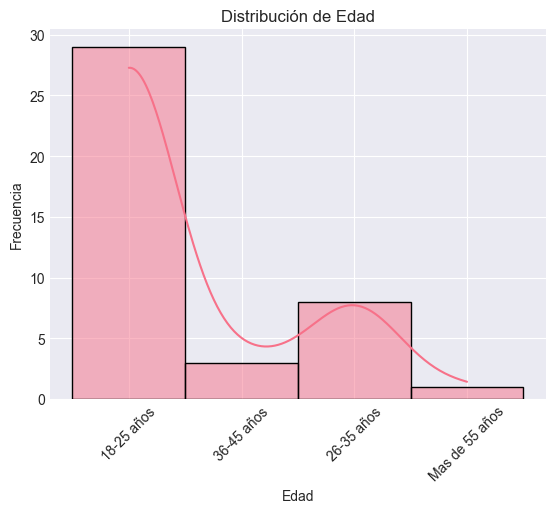

In [11]:
# Analisis edad
print("Porcentajes:")
print(df_clean['edad'].value_counts(normalize=True) * 100)


orden_edad = ['18-25 años', '26-35 años', '36-45 años', '46-55 años', 'Más de 55 años']
sns.histplot(data=df_clean, x='edad', kde=True)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")
plt.show()


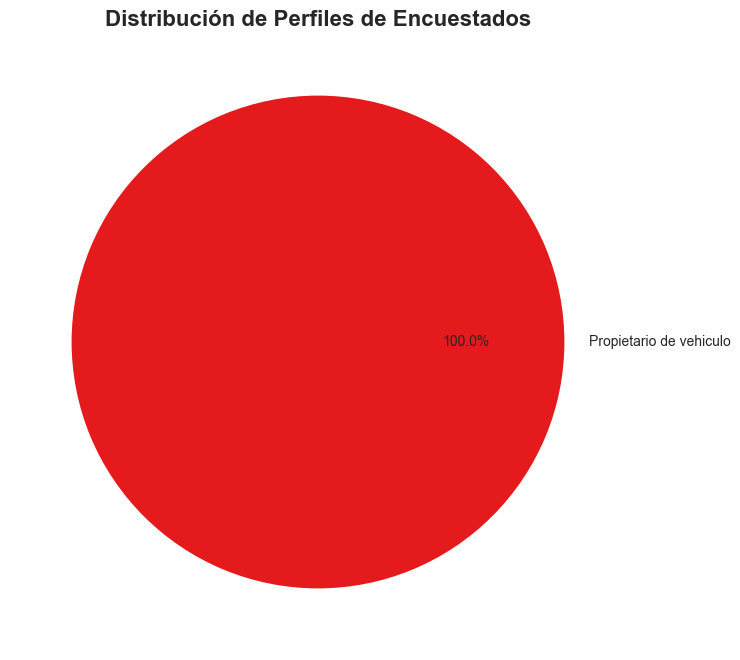

In [12]:
# Análisis perfil

perfil_counts = df_clean['perfil'].value_counts()
labels = perfil_counts.index

plt.figure(figsize=(8, 8))
plt.pie(perfil_counts, labels=labels, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('Set1', len(labels)))

plt.title('Distribución de Perfiles de Encuestados', fontsize=16, fontweight='bold')
plt.show()

C:\Users\will-\AppData\Local\Temp\ipykernel_16508\4064033549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


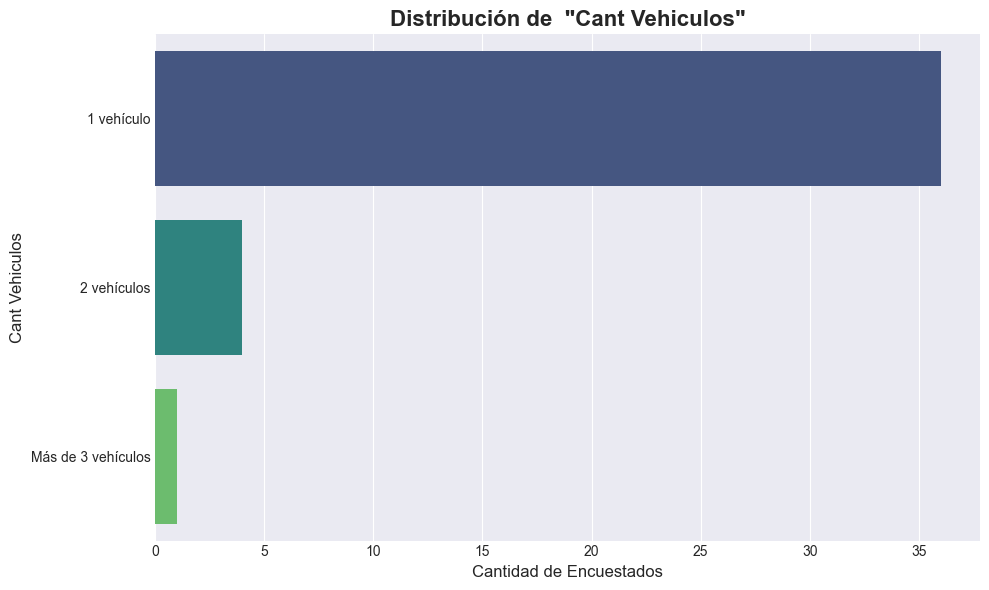

In [13]:
#análisis con grafica de barras

analizar = 'cant_vehiculos'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='viridis'
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\will-\AppData\Local\Temp\ipykernel_16508\1396806010.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


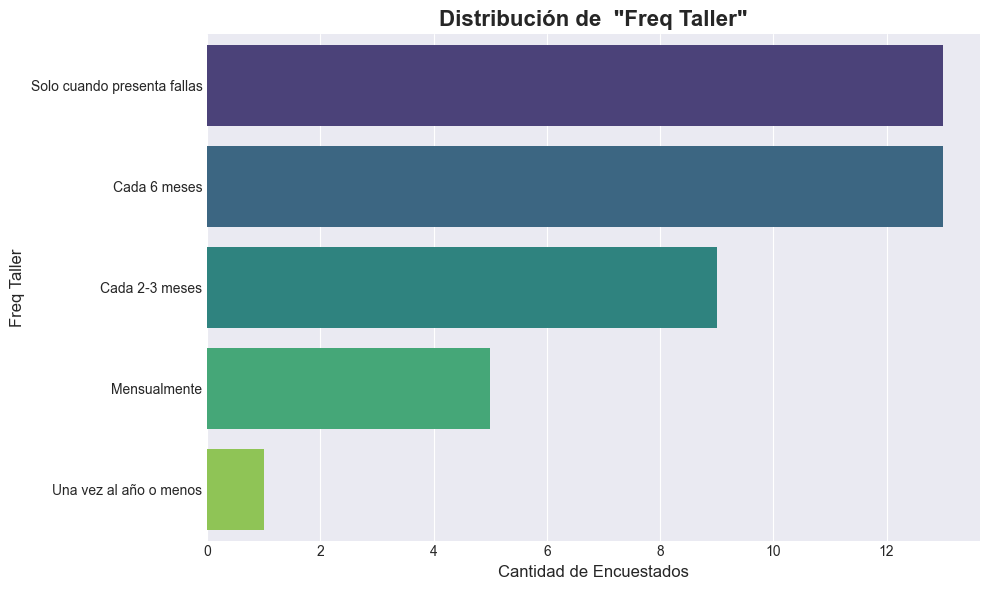

In [14]:
#análisis con grafica de barras

analizar = 'freq_taller'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='viridis'
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\will-\AppData\Local\Temp\ipykernel_16508\1388465763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


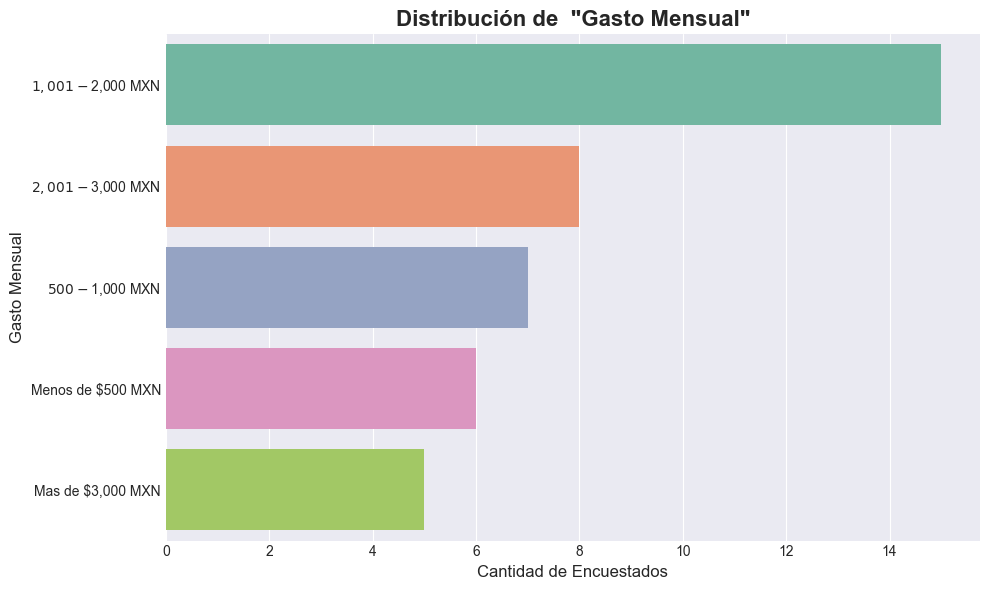

In [15]:
#análisis con grafica de barras

analizar = 'gasto_mensual'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='Set2'
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\will-\AppData\Local\Temp\ipykernel_16508\500724400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


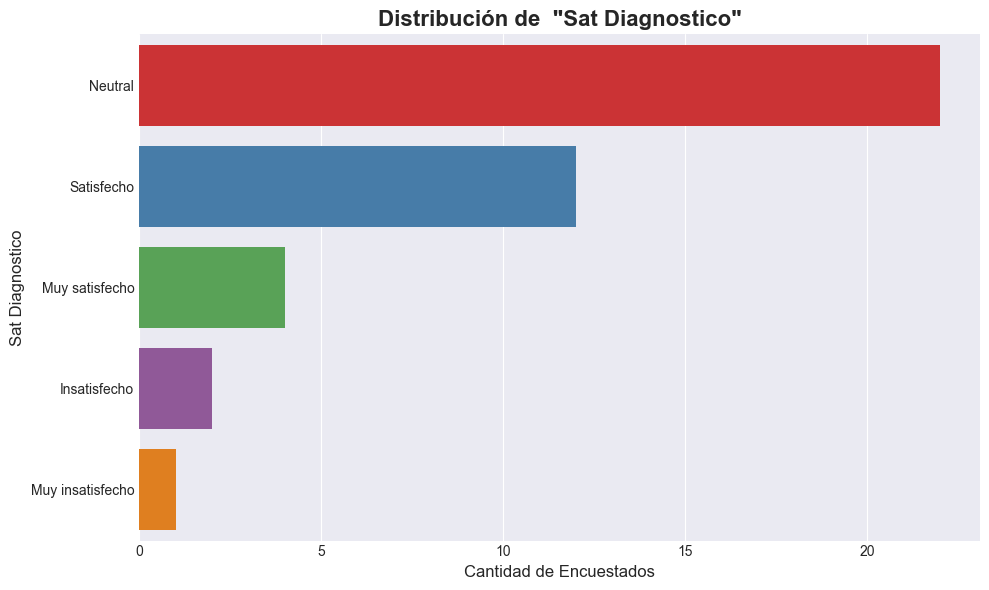

In [16]:
#análisis con grafica de barras

analizar = 'sat_diagnostico'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='Set1',
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\will-\AppData\Local\Temp\ipykernel_16508\3027563104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


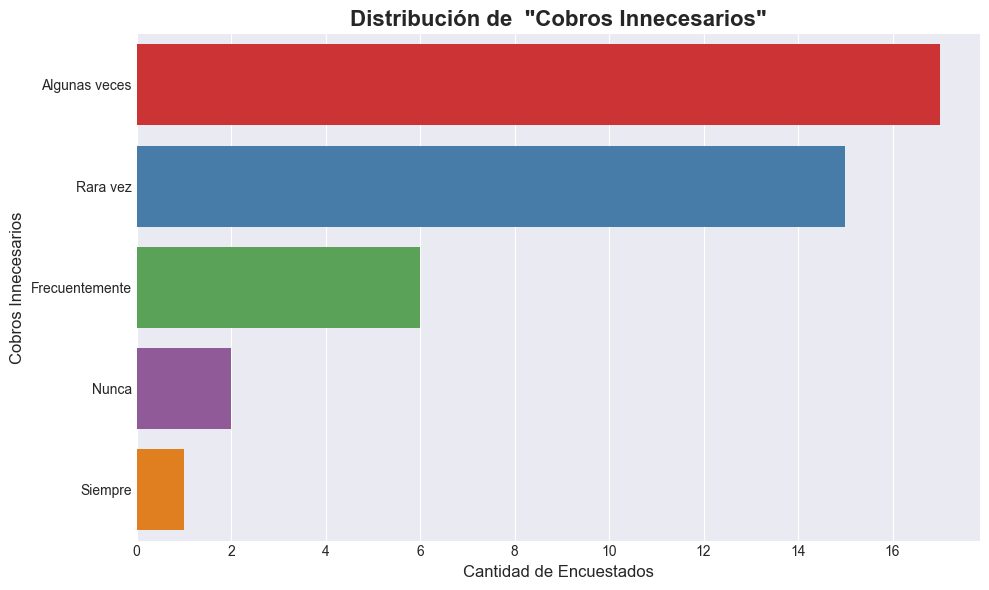

In [17]:
#análisis con grafica de barras

analizar = 'cobros_innecesarios'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='Set1'
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

cobros_innecesarios
Algunas veces     17
Rara vez          15
Frecuentemente     6
Nunca              2
Siempre            1
Name: count, dtype: int64


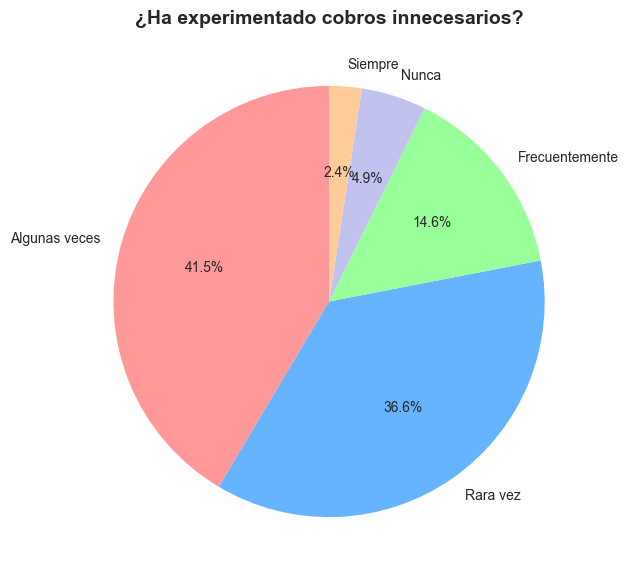

In [18]:
# analisis cobros innecesarios
print(df_clean['cobros_innecesarios'].value_counts())

plt.figure(figsize=(7, 7))
df_clean['cobros_innecesarios'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff', "#99ff99", "#c2c2f0", "#ffcc99"], startangle=90)
plt.title('¿Ha experimentado cobros innecesarios?', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

C:\Users\will-\AppData\Local\Temp\ipykernel_16508\4022682183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


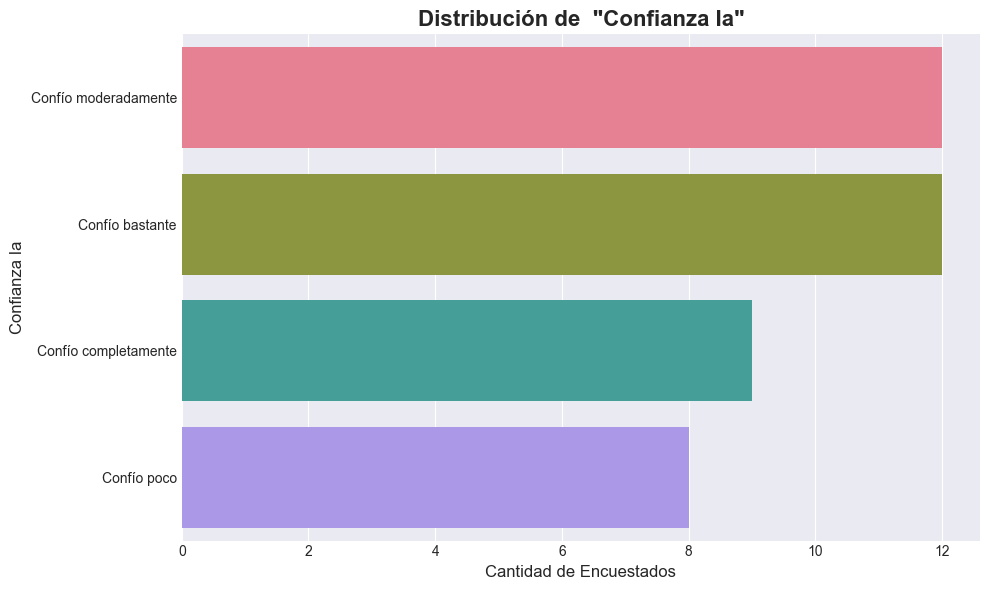

In [19]:
#análisis con grafica de barras

analizar = 'confianza_ia'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='husl',
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\will-\AppData\Local\Temp\ipykernel_16508\2676755109.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


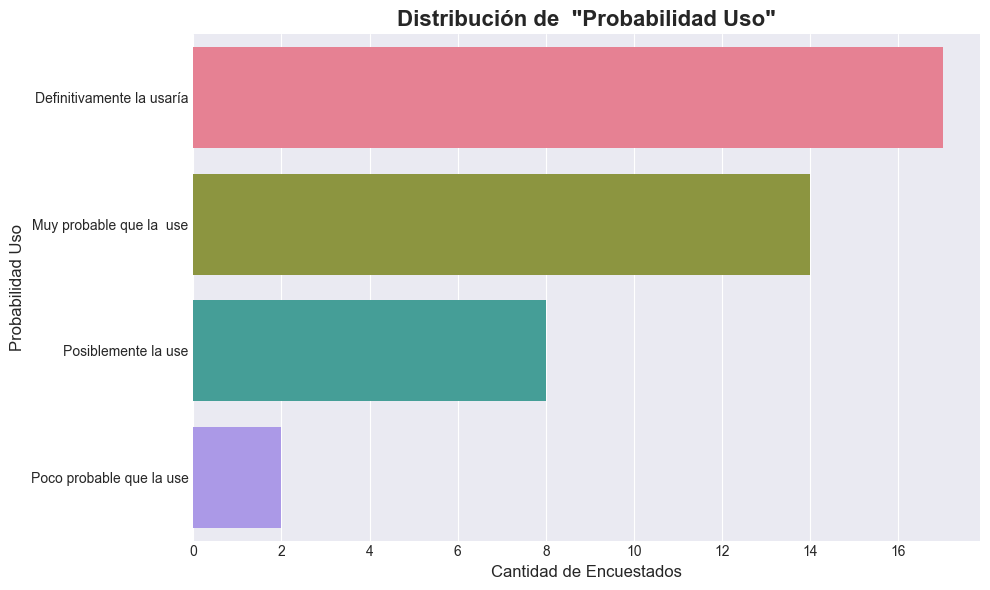

In [20]:
#análisis con grafica de barras

analizar = 'probabilidad_uso'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='husl'
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

In [21]:
#Convertir las variables a numeros para poder calcular (dar esaclas)

df_clean['edad_map'] = df_clean['edad'].map({
    '18-25 años': 1,
    '26-35 años': 2,
    '36-45 años': 3,
    '46-55 años': 4,
    'Mas de 55 años': 5 
})

df_clean['freq_taller_map'] = df_clean['freq_taller'].map({
    'Solo cuando presenta fallas': 1,
    'Una vez al año o menos': 2,
    'Cada 6 meses': 3,
    'Cada 2-3 meses': 4,
    'Mensualmente': 5 
})

df_clean['gasto_mensual_map'] = df_clean['gasto_mensual'].map({
    'Menos de $500 MXN': 1,
    '500-$1,000 MXN': 2, 
    '$500-$1,000 MXN': 2,
    '$1,001-$2,000 MXN': 3,
    '$2,001-$3,000 MXN': 4,
    'Mas de $3,000 MXN': 5
})

df_clean['sat_diagnostico_map'] = df_clean['sat_diagnostico'].map({
    'Muy insatisfecho': 1,
    'Insatisfecho': 2,
    'Neutral': 3,
    'Satisfecho': 4,
    'Muy satisfecho': 5
})

df_clean['util_app_map'] = df_clean['util_app'].map({
    'Nada útil': 1,
    'Poco útil': 2,
    'Moderadamente útil': 3, 
    'Muy útil': 4,
    'Extremadamente útil': 5
})

df_clean['confianza_ia_map'] = df_clean['confianza_ia'].map({
    'No confío para nada': 1, 
    'Confío poco': 2,
    'Confío moderadamente': 3,
    'Confío bastante': 4,
    'Confío completamente': 5
})

df_clean['probabilidad_uso_map'] = df_clean['probabilidad_uso'].map({
    'Poco probable que la use': 1,
    'Posiblemente la use': 2,
    'Muy probable que la  use': 3,
    'Muy probable que la use': 3,   
    'Definitivamente la usaría': 4,
    'Muy probable que la  use': 3 
})




print(df_clean[['edad', 'edad_map']].head())
print(df_clean[['freq_taller', 'freq_taller_map']].head())
print(df_clean[['gasto_mensual', 'gasto_mensual_map']].head())
print(df_clean[['sat_diagnostico', 'sat_diagnostico_map']].head())
print(df_clean[['util_app', 'util_app_map']].head())
print(df_clean[['confianza_ia', 'confianza_ia_map']].head())
print(df_clean[['probabilidad_uso', 'probabilidad_uso_map']].head())


         edad  edad_map
0  18-25 años         1
1  36-45 años         3
2  18-25 años         1
3  26-35 años         2
4  26-35 años         2
                   freq_taller  freq_taller_map
0                 Mensualmente                5
1  Solo cuando presenta fallas                1
2  Solo cuando presenta fallas                1
3                 Cada 6 meses                3
4                 Cada 6 meses                3
       gasto_mensual  gasto_mensual_map
0    $500-$1,000 MXN                  2
1  $1,001-$2,000 MXN                  3
2  $2,001-$3,000 MXN                  4
3  Mas de $3,000 MXN                  5
4  $1,001-$2,000 MXN                  3
  sat_diagnostico  sat_diagnostico_map
0      Satisfecho                    4
1      Satisfecho                    4
2         Neutral                    3
3         Neutral                    3
4         Neutral                    3
              util_app  util_app_map
0             Muy útil             4
1  Extremadamente út

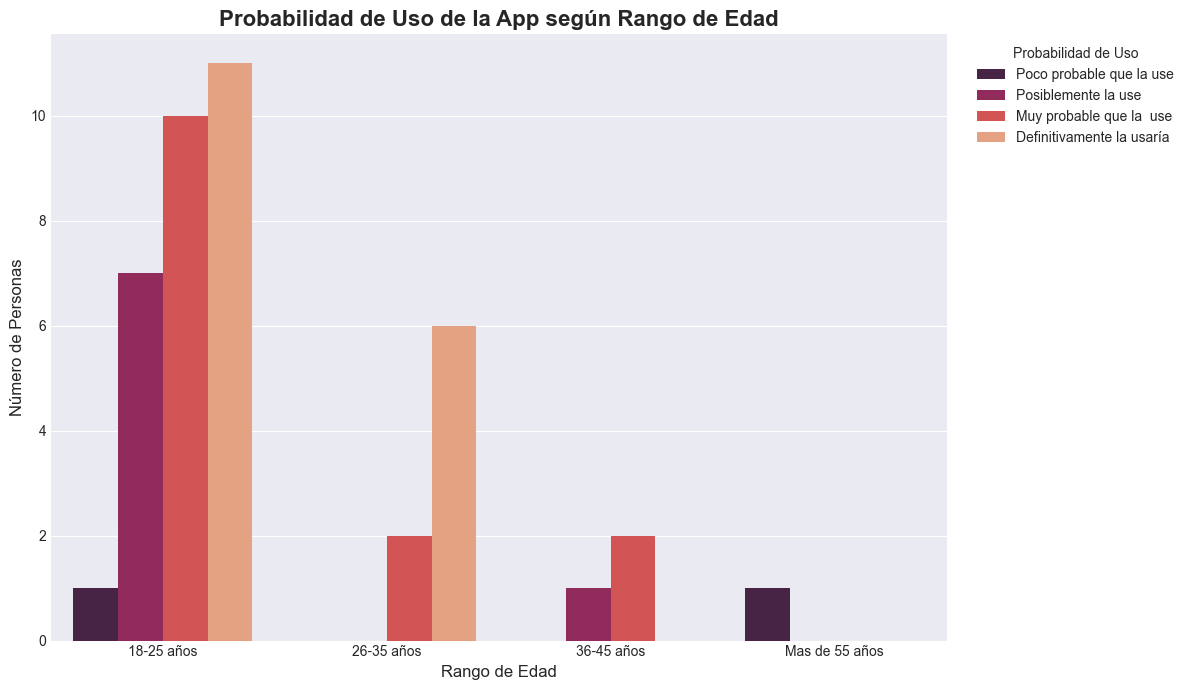

In [22]:
#analisis bivariado: edad vs probabilidad de uso

tabla_cruzada_texto = pd.crosstab(df_clean['edad'], df_clean['probabilidad_uso'])

plt.figure(figsize=(12, 7))

orden_edad = ['18-25 años', '26-35 años', '36-45 años', 'Mas de 55 años']
orden_prob = [
    'Poco probable que la use',
    'Posiblemente la use',
    'Muy probable que la  use', 
    'Definitivamente la usaría'
]

ax = sns.countplot(
    data=df_clean,
    x='edad',               
    hue='probabilidad_uso',  
    order=orden_edad,         
    hue_order=orden_prob,    
    palette='rocket'
)

plt.title('Probabilidad de Uso de la App según Rango de Edad', fontsize=16, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)
plt.xticks(rotation=0)

plt.legend(title='Probabilidad de Uso', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

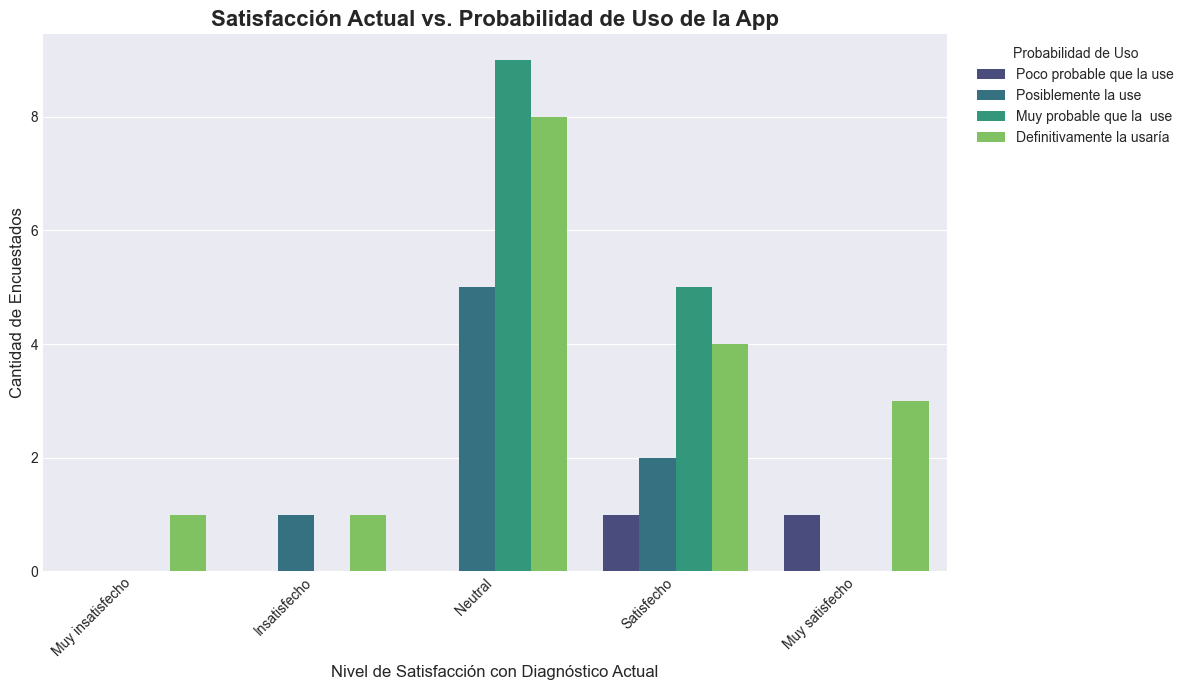

In [23]:
### ANÁLISIS: [Variable X] vs [Variable Hue]

plt.figure(figsize=(12, 7))

orden_x = ['Muy insatisfecho', 'Insatisfecho', 'Neutral', 'Satisfecho', 'Muy satisfecho']
orden_hue = [
    'Poco probable que la use',
    'Posiblemente la use',
    'Muy probable que la  use',
    'Definitivamente la usaría'
]

ax = sns.countplot(
    data=df_clean,
    x='sat_diagnostico',
    hue='probabilidad_uso',
    order=orden_x,
    hue_order=orden_hue,
    palette='viridis'
)

ax.set_title('Satisfacción Actual vs. Probabilidad de Uso de la App', fontsize=16, fontweight='bold')
ax.set_xlabel('Nivel de Satisfacción con Diagnóstico Actual', fontsize=12)
ax.set_ylabel('Cantidad de Encuestados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Probabilidad de Uso', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

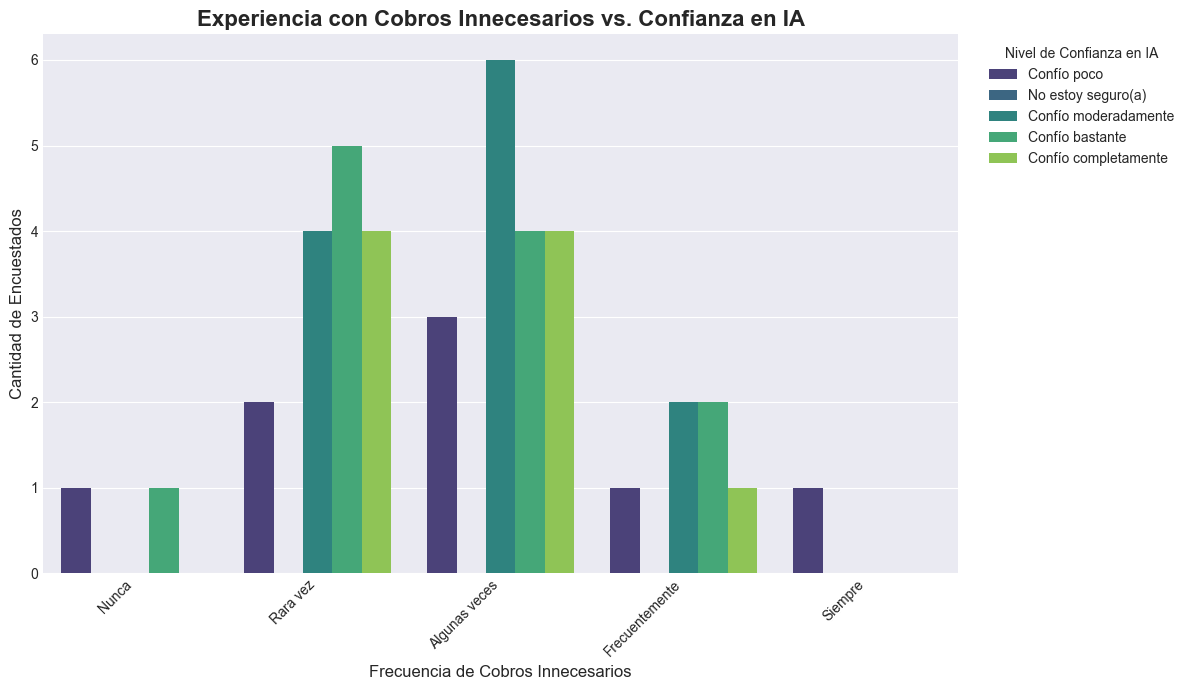

In [24]:
### ANÁLISIS: [Variable X] vs [Variable Hue]

plt.figure(figsize=(12, 7))

orden_x = ['Nunca', 'Rara vez', 'Algunas veces', 'Frecuentemente', 'Siempre']
orden_hue = ['Confío poco', 'No estoy seguro(a)', 'Confío moderadamente', 'Confío bastante', 'Confío completamente']

ax = sns.countplot(
    data=df_clean,
    x='cobros_innecesarios',
    hue='confianza_ia',
    order=orden_x,
    hue_order=orden_hue,
    palette='viridis'
)

ax.set_title('Experiencia con Cobros Innecesarios vs. Confianza en IA', fontsize=16, fontweight='bold')
ax.set_xlabel('Frecuencia de Cobros Innecesarios', fontsize=12)
ax.set_ylabel('Cantidad de Encuestados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nivel de Confianza en IA', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

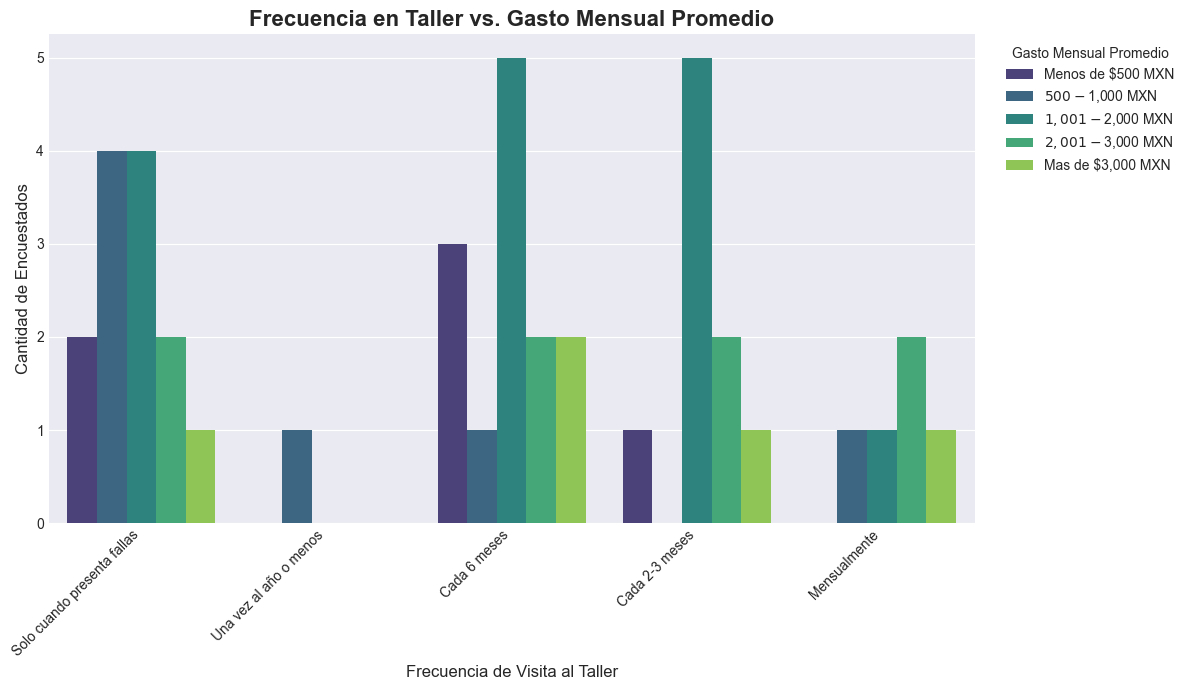

In [25]:
### ANÁLISIS: [Variable X] vs [Variable Hue]

plt.figure(figsize=(12, 7))

orden_x = ['Solo cuando presenta fallas', 'Una vez al año o menos', 'Cada 6 meses', 'Cada 2-3 meses', 'Mensualmente']
orden_hue = ['Menos de $500 MXN', '$500-$1,000 MXN', '$1,001-$2,000 MXN', '$2,001-$3,000 MXN', 'Mas de $3,000 MXN']

ax = sns.countplot(
    data=df_clean,
    x='freq_taller',
    hue='gasto_mensual',
    order=orden_x,
    hue_order=orden_hue,
    palette='viridis'
)

ax.set_title('Frecuencia en Taller vs. Gasto Mensual Promedio', fontsize=16, fontweight='bold')
ax.set_xlabel('Frecuencia de Visita al Taller', fontsize=12)
ax.set_ylabel('Cantidad de Encuestados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gasto Mensual Promedio', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

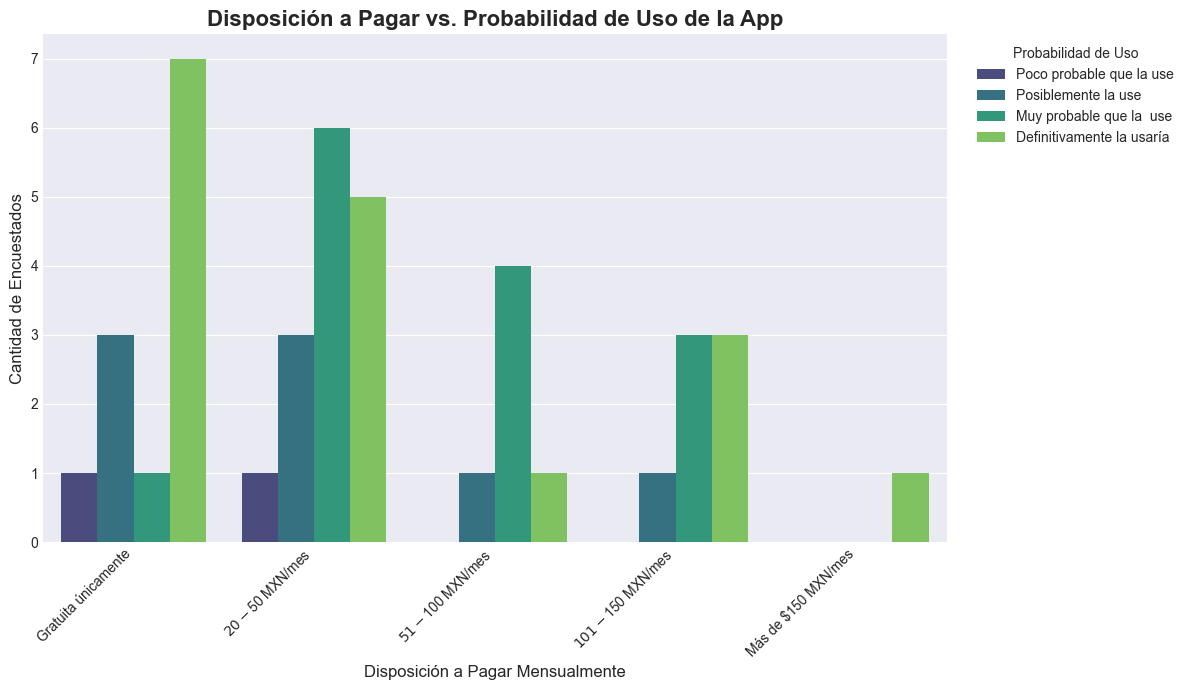

In [26]:
### ANÁLISIS: Disposición a Pagar vs. Probabilidad de Uso (Modelo de Negocio)

plt.figure(figsize=(12, 7))

orden_x = ['Gratuita únicamente', '$20-$50 MXN/mes', '$51-$100 MXN/mes', '$101-$150 MXN/mes', 'Más de $150 MXN/mes']
orden_hue = [
    'Poco probable que la use',
    'Posiblemente la use',
    'Muy probable que la  use', 
    'Definitivamente la usaría'
]
ax = sns.countplot(
    data=df_clean,
    x='pago_dispuesto',
    hue='probabilidad_uso',
    order=orden_x,
    hue_order=orden_hue,
    palette='viridis'
)

ax.set_title('Disposición a Pagar vs. Probabilidad de Uso de la App', fontsize=16, fontweight='bold')
ax.set_xlabel('Disposición a Pagar Mensualmente', fontsize=12)
ax.set_ylabel('Cantidad de Encuestados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Probabilidad de Uso', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

--- Tabla de Contingencia: Edad vs. Gasto Mensual ---
gasto_mensual   $1,001-$2,000 MXN  $2,001-$3,000 MXN  $500-$1,000 MXN  \
edad                                                                    
18-25 años                     11                  6                6   
26-35 años                      3                  1                1   
36-45 años                      1                  0                0   
Mas de 55 años                  0                  1                0   

gasto_mensual   Mas de $3,000 MXN  Menos de $500 MXN  
edad                                                  
18-25 años                      2                  4  
26-35 años                      2                  1  
36-45 años                      1                  1  
Mas de 55 años                  0                  0  


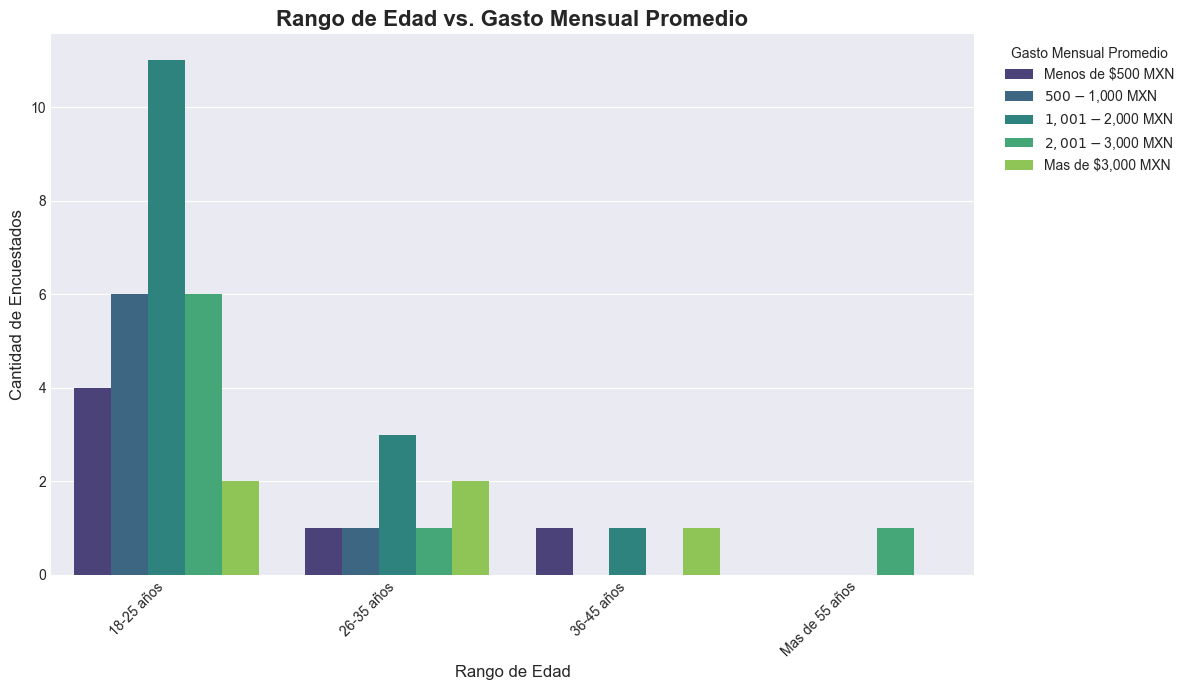

In [27]:
### ANÁLISIS: Edad vs. Gasto Mensual (Segmentación)

# 1. (Opcional) Ver la tabla de contingencia
print("--- Tabla de Contingencia: Edad vs. Gasto Mensual ---")
print(pd.crosstab(df_clean['edad'], df_clean['gasto_mensual']))

# 2. Gráfica de Barras Agrupadas
plt.figure(figsize=(12, 7))

# --- Define el orden lógico para las categorías de texto ---
orden_x = ['18-25 años', '26-35 años', '36-45 años', 'Mas de 55 años']
orden_hue = ['Menos de $500 MXN', '$500-$1,000 MXN', '$1,001-$2,000 MXN', '$2,001-$3,000 MXN', 'Mas de $3,000 MXN']

# --- Llama a la gráfica ---
ax = sns.countplot(
    data=df_clean,
    x='edad',
    hue='gasto_mensual',
    order=orden_x,
    hue_order=orden_hue,
    palette='viridis'
)

# --- Títulos y etiquetas ---
ax.set_title('Rango de Edad vs. Gasto Mensual Promedio', fontsize=16, fontweight='bold')
ax.set_xlabel('Rango de Edad', fontsize=12)
ax.set_ylabel('Cantidad de Encuestados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gasto Mensual Promedio', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

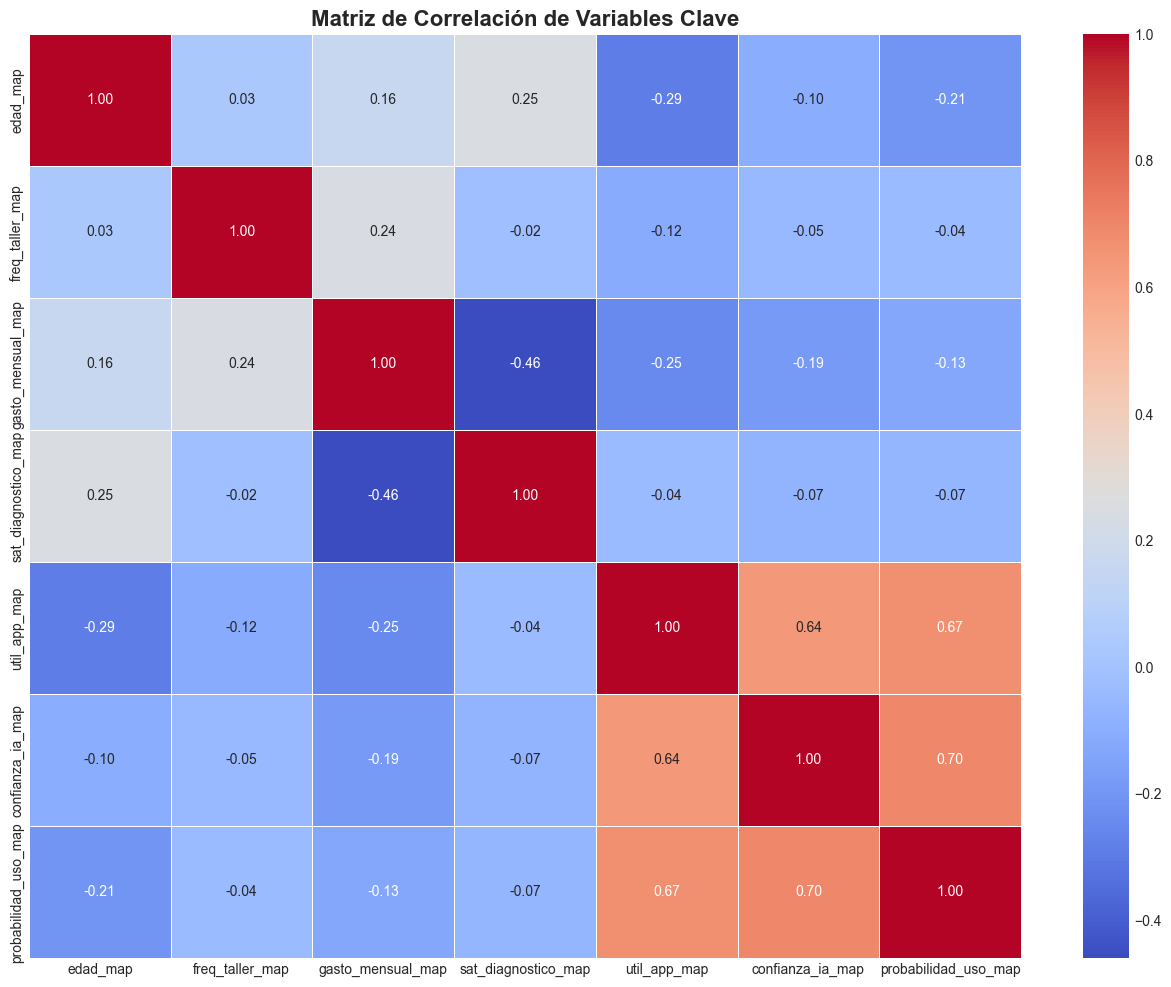

In [28]:
### ANÁLISIS DE CORRELACIÓN GENERAL (coorrelacion variables map)


columnas_numericas = [col for col in df_clean.columns if '_map' in col]
df_numerico = df_clean[columnas_numericas]

matriz_corr = df_numerico.corr()

plt.figure(figsize=(16, 12))
ax = sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
ax.set_title('Matriz de Correlación de Variables Clave', fontsize=16, fontweight='bold')
plt.show()